In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline

In [3]:
# Data load
df = pd.read_csv('retail_sales_dataset.csv')

In [4]:
# Check out the dataset
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
# Dataset Dimensions
df.shape

(1000, 9)

In [6]:
# Columns 
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Transaction ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,41.392,13.681430,18.0,29.00,42.0,53.00,64.0
Quantity,1000.0,2.514,1.132734,1.0,1.00,3.0,4.00,4.0
Price per Unit,1000.0,179.890,189.681356,25.0,30.00,50.0,300.00,500.0
Total Amount,1000.0,456.000,559.997632,25.0,60.00,135.0,900.00,2000.0


In [8]:
# Check out null values 
df.isnull().mean()*100

Transaction ID      0.0
Date                0.0
Customer ID         0.0
Gender              0.0
Age                 0.0
Product Category    0.0
Quantity            0.0
Price per Unit      0.0
Total Amount        0.0
dtype: float64

In [9]:
df.duplicated().sum

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool>

['Male' 'Female']


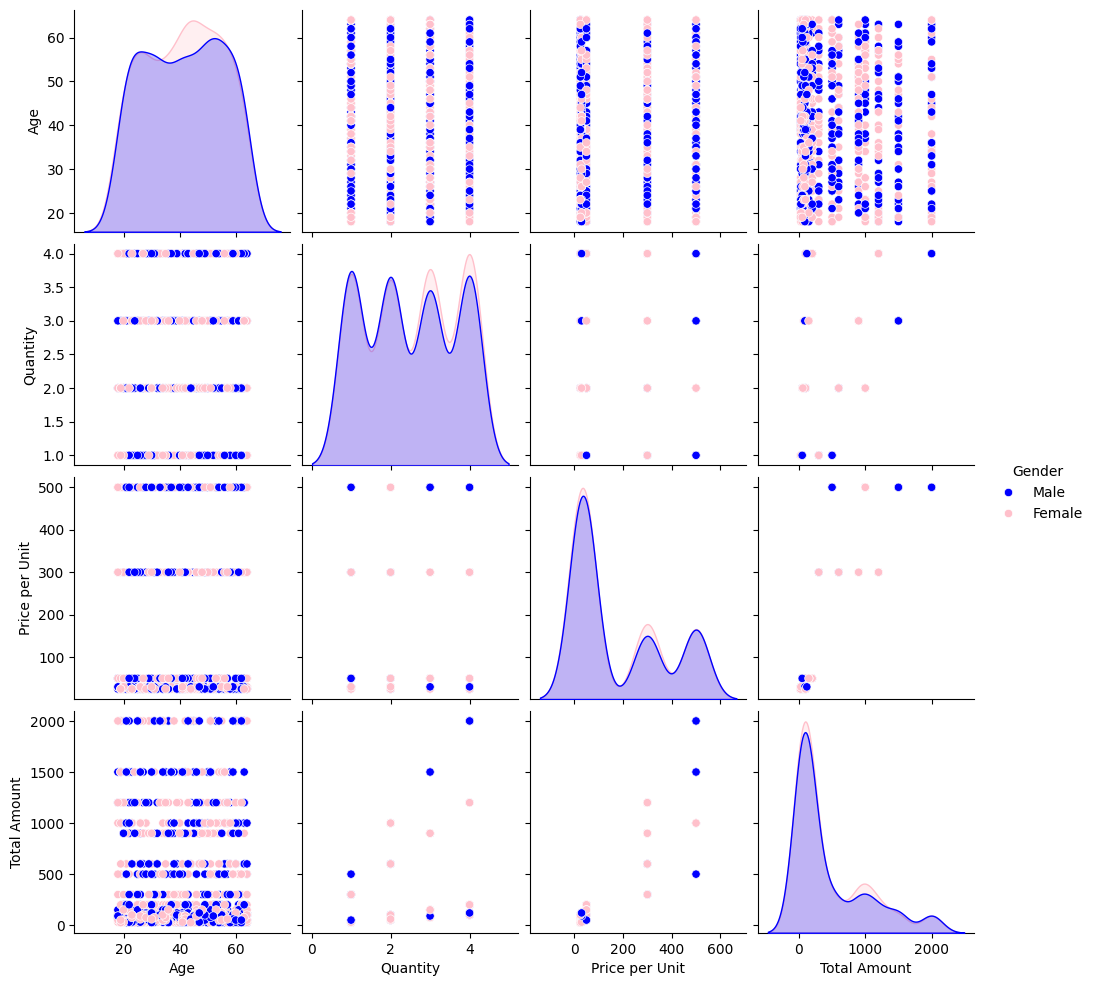

In [10]:
# Verificar valores únicos de Gender
print(df['Gender'].unique())

# Definir paleta
custom_palette = {
    'Male': 'blue',
    'Female': 'pink'
}

# Asegurar que las columnas sean numéricas
df['Age'] = df['Age'].astype(float)
df['Quantity'] = df['Quantity'].astype(float)
df['Price per Unit'] = df['Price per Unit'].astype(float)
df['Total Amount'] = df['Total Amount'].astype(float)

# Generar pairplot
sns.pairplot(df[['Age', 'Quantity', 'Price per Unit', 'Total Amount', 'Gender']], 
             hue='Gender', 
             palette=custom_palette)

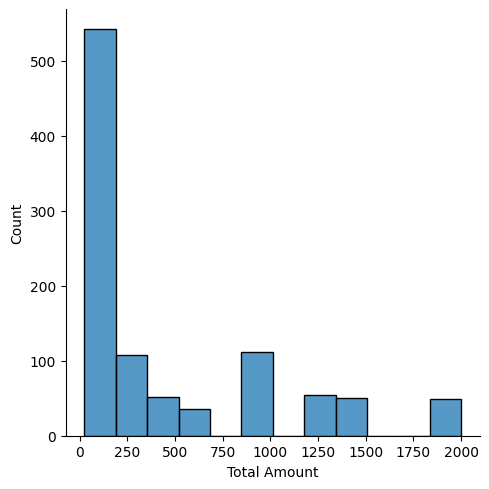

In [11]:
sns.displot(df['Total Amount'])

<Axes: >

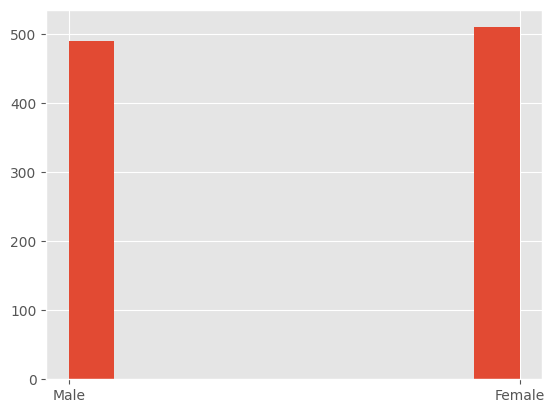

In [12]:
plt.style.use('ggplot')
(df['Gender']).hist()

In [13]:
df['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

<Axes: >

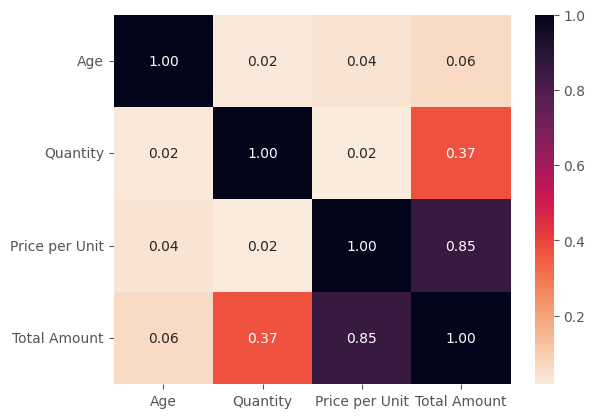

In [16]:
# Seleccionar solo las columnas numéricas
numeric_columns = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']

# Calcular la matriz de correlaciones 
correlation_matrix = abs(df[numeric_columns].corr())

# Heatmap
sns.heatmap(correlation_matrix, cmap="rocket_r", annot=True, fmt=".2f")

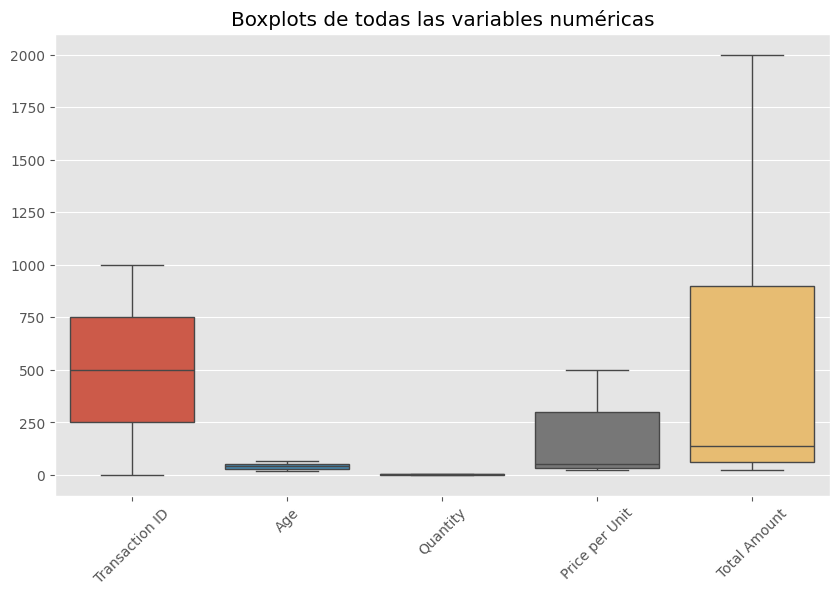

In [19]:
# Usar solo columnas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Crear box-plots para todas las variables numéricas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplots de todas las variables numéricas')
plt.show()

In [20]:
# Columnas a eliminar
columns_to_drop = ['Transaction ID', 'Date', 'Customer ID', 'Product Category', 'Price per Unit']

# Eliminar columnas
df_cleaned = df.drop(columns=columns_to_drop)

# Aplicar one-hot encoding a Gender
df_cleaned = pd.get_dummies(df_cleaned, columns=['Gender'], drop_first=True)

# Verificar las columnas restantes
print(df_cleaned.columns)

Index(['Age', 'Quantity', 'Total Amount', 'Gender_Male'], dtype='object')


In [23]:
# Seleccionar columnas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calcular asimetría para cada variable numérica
skewness = df[numeric_columns].skew()
print("Asimetría de las variables numéricas:")
print(skewness.sort_values(ascending=False))


Asimetría de las variables numéricas:
Total Amount      1.376128
Price per Unit    0.736308
Transaction ID    0.000000
Quantity         -0.014036
Age              -0.048812
dtype: float64


In [27]:
from scipy.stats import skew

# Seleccionar solo columnas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Bucle sobre las variables numéricas
for col in numeric_columns:
    # Calcular la skewness
    sk = skew(df[col].dropna())  # Eliminar valores nulos para evitar errores
    print(f"Skewness de {col}: {sk:.2f}")
    if sk > 1:
        df[col] = np.log1p(df[col])  # log(x + 1) para asimetría positiva
        print(f"Aplicada transformación log1p a {col}")
    elif sk < -1:
        max_val = df[col].max()
        df[col] = np.log1p(max_val + 1 - df[col])  # Reflejar + log para asimetría negativa
        print(f"Aplicada transformación log1p reflejada a {col}")

# Verificar las nuevas skewness (opcional)
for col in numeric_columns:
    new_sk = skew(df[col].dropna())
    print(f"Nueva skewness de {col}: {new_sk:.2f}")

ModuleNotFoundError: No module named 'scipy'